In [6]:
!sudo pip install -U geopandas fiona shapely pyproj geopy pysal descartes

The directory '/home/ubuntu/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/ubuntu/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
Requirement already up-to-date: geopandas in /usr/local/lib/python3.5/dist-packages
    100% |████████████████████████████████| 39.7MB 38kB/s  eta 0:00:01
Requirement already up-to-date: shapely in /usr/local/lib/python3.5/dist-packages
Requirement already up-to-date: pyproj in /usr/local/lib/python3.5/dist-packages
Requirement already up-to-date: geopy in /usr/local/lib/python3.5/dist-packages
Requirement already up-to-date: pysal in /usr/local/lib/python3.5/dist-packages
Requirement already up-to-dat

In [7]:
!sudo apt-get install -y libgeos-dev python3-rtree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.5.0-1ubuntu2).
python3-rtree is already the newest version (0.8.2+ds-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [8]:
import geopandas as gpd

In [9]:
gpd.datasets.available

['naturalearth_lowres', 'naturalearth_cities']

In [ ]:
!mkdir data

In [ ]:
# Dataset from NYC Open Data: https://data.cityofnewyork.us/City-Government/Neighborhood-Tabulation-Areas/cpf4-rkhq
!curl 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON' -o data/nyc-neighborhoods.geojson

In [10]:
df_nyc = gpd.GeoDataFrame.from_file('data/nyc-neighborhoods.geojson')

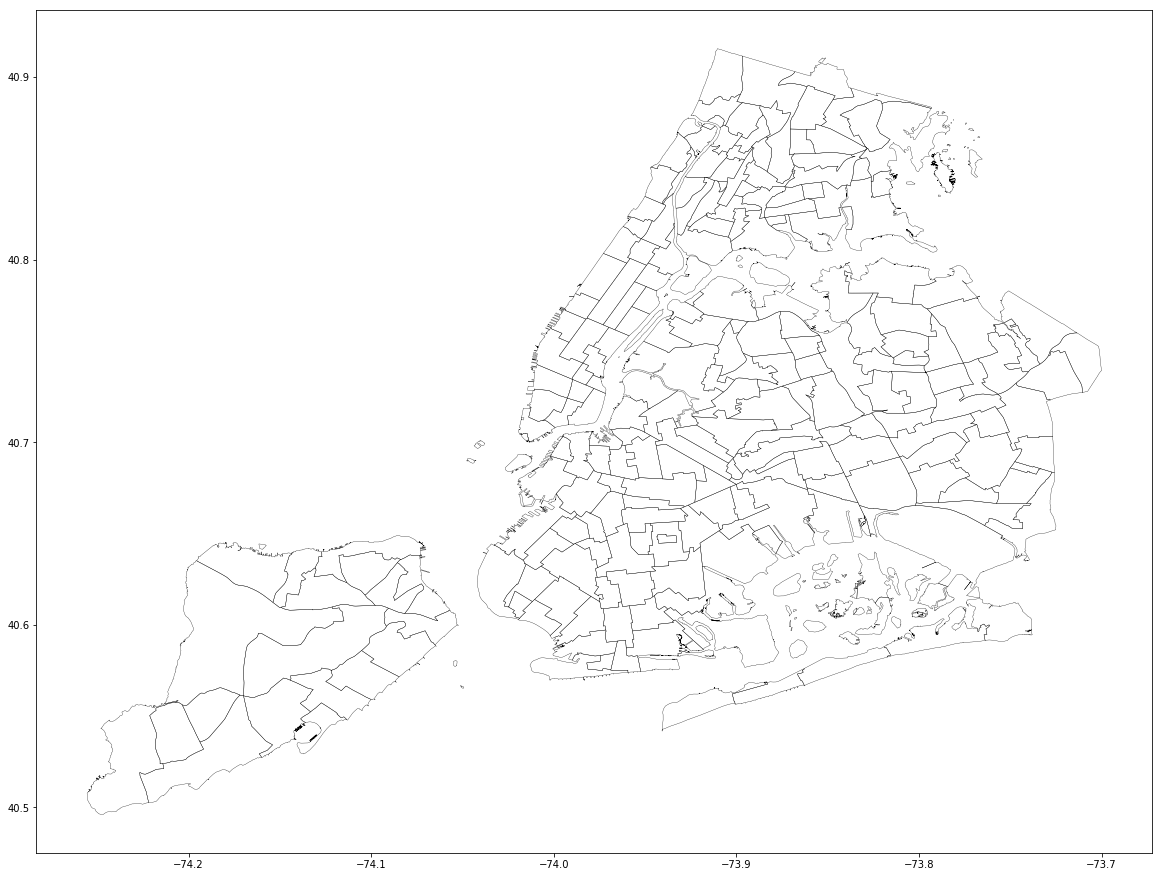

In [11]:
%matplotlib inline
base = df_nyc.plot(figsize=(20,20), linewidth=0.3, color='white')

In [12]:
import requests
import pandas as pd
import numpy as np
url = 'http://www.citibikenyc.com/stations/json'
data = requests.get(url).json()["stationBeanList"]
df = pd.DataFrame(data)
    
df["perc_full"] = np.vectorize(lambda x,y: x/y if y>0 else None)(df['availableBikes'],df['totalDocks'])

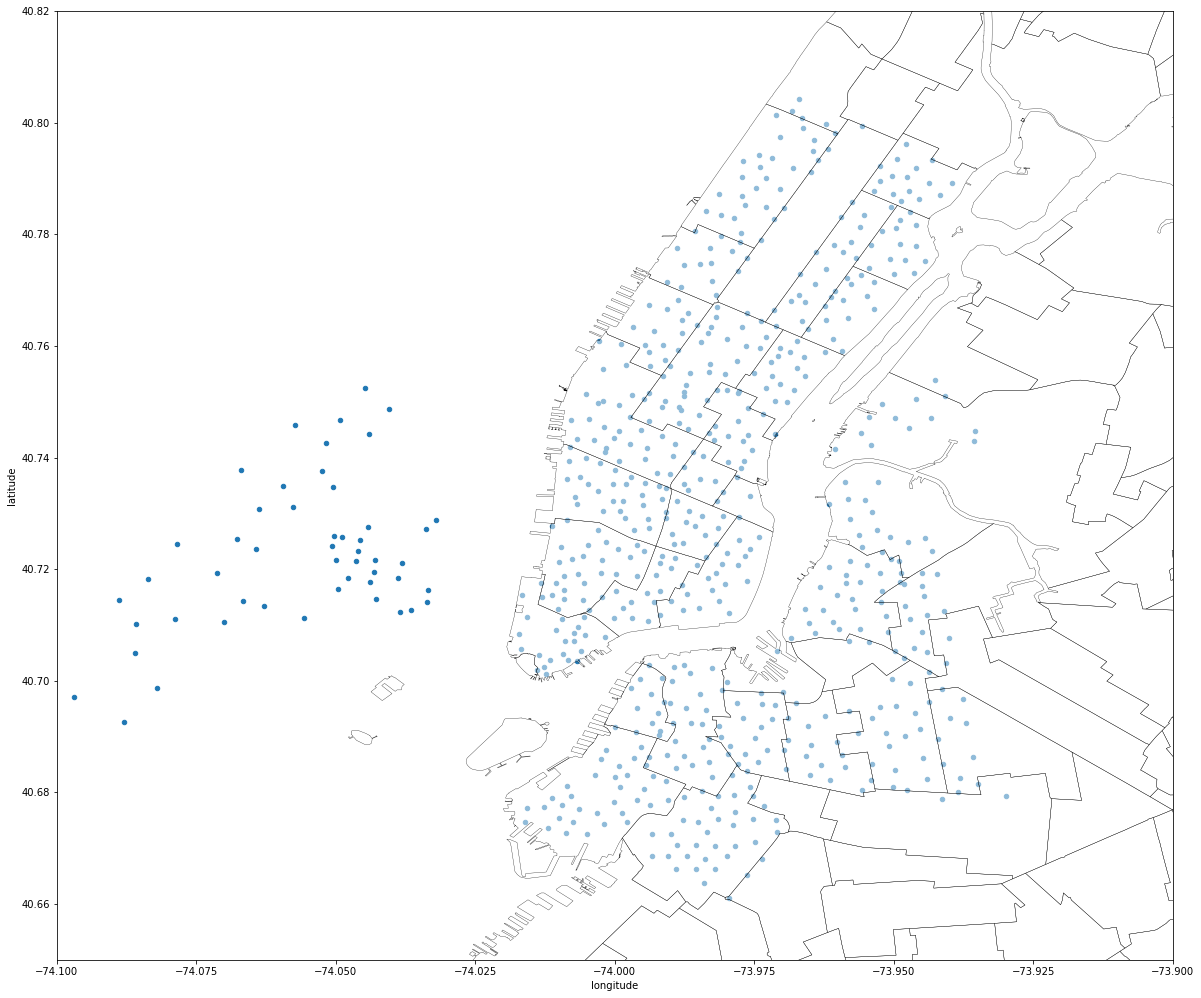

In [13]:
# Example of merging a "regular" Pandas scatterplot with a GeoPandas plot
# using "Method 2" from http://geopandas.org/mapping.html#maps-with-layers

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_aspect('equal')

ax.set_xlim( (-74.1,-73.9)  )
ax.set_ylim( (40.65, 40.82) )

df_nyc.plot(figsize=(20,20), linewidth=0.3, color='white',ax=ax)
df.plot(kind='scatter', x='longitude', y='latitude', ax=ax, figsize=(20,20))

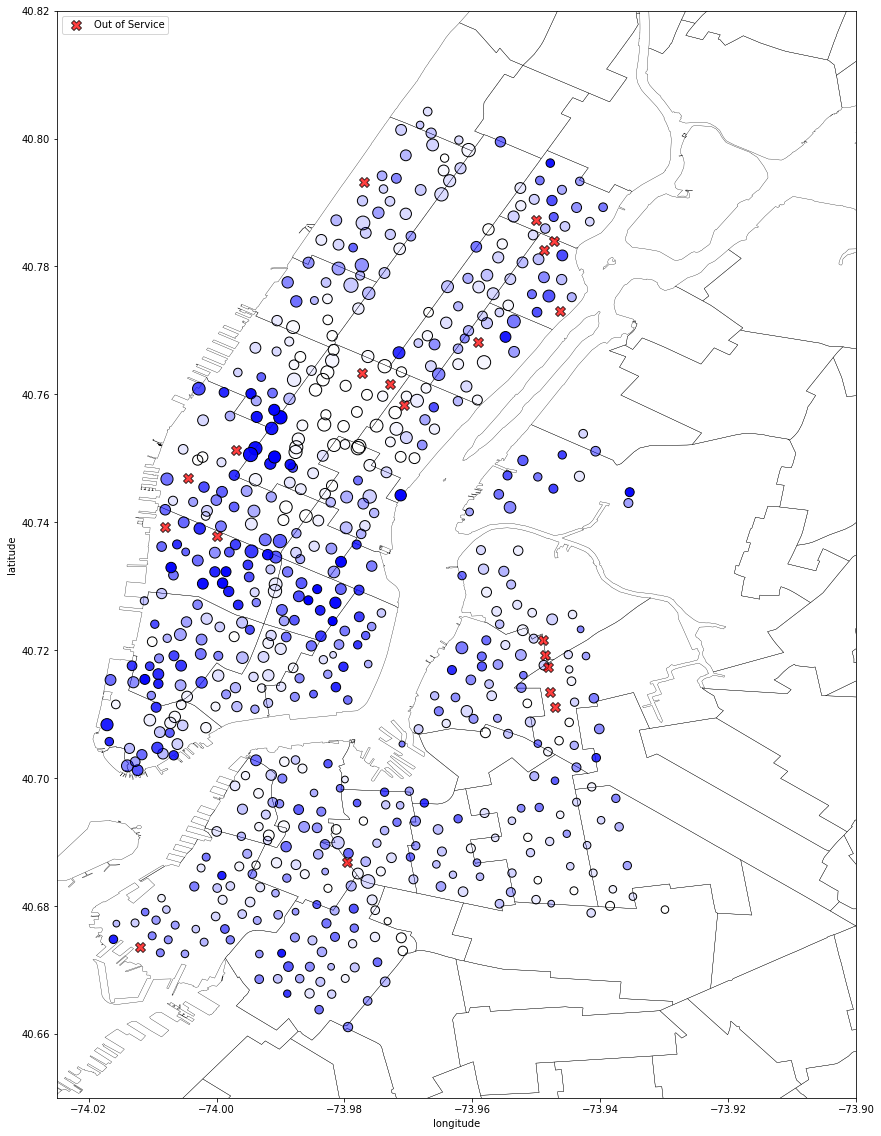

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_aspect('equal')

ax.set_xlim( (-74.025,-73.9)  )
ax.set_ylim( (40.65  , 40.82) )

# df.plot(kind='scatter', x='longitude', y='latitude', ax=ax, figsize=(20,20))

# And now make the size of each point proportional to the size of available bikes
# using the s option in the plot
inservice = df[df["statusValue"] == 'In Service']
outofservice = df[df["statusValue"] == 'Not In Service']



df_nyc.plot(figsize=(20,20), linewidth=0.3, color='White',ax=ax, alpha = 0.5, zorder=1)



# Following http://stackoverflow.com/questions/26738881/setting-scatter-points-transparency-from-data-array-in-matplotlib-plot
# to set alpha in varying degrees
c = np.asarray([(0, 0, 1, a) for a in inservice['perc_full']])

'''
inservice.plot(ax = ax, kind='scatter',  figsize=(20,20),
                                   x='longitude', 
                                   y='latitude', 
                                   color=c,
                                   edgecolors='DarkBlue',
                                  label='In Service', 
                                  s=2*inservice['totalDocks'])
                                  
'''


plt.scatter(
                               x=inservice['longitude'], 
                               y=inservice['latitude'], 
                               color=c, edgecolors='Black', label='In Service', 
                               # alpha=inservice['perc_full'],
                             s=3*inservice['totalDocks'], zorder=2)


outofservice.plot(ax = ax, kind='scatter',  figsize=(20,20),
                                   x='longitude', 
                                   y='latitude', 
                                  edgecolor = 'Black',
                                   color='Red', marker = 'X',
                                   s = 100, alpha = 0.75,
                                   label = 'Out of Service', zorder=3)

In [15]:
# More data at https://github.com/dwillis/nyc-maps
!curl -s -L https://raw.githubusercontent.com/dwillis/nyc-maps/master/police_precincts.geojson -o data/nyc_police_precincts.geojson

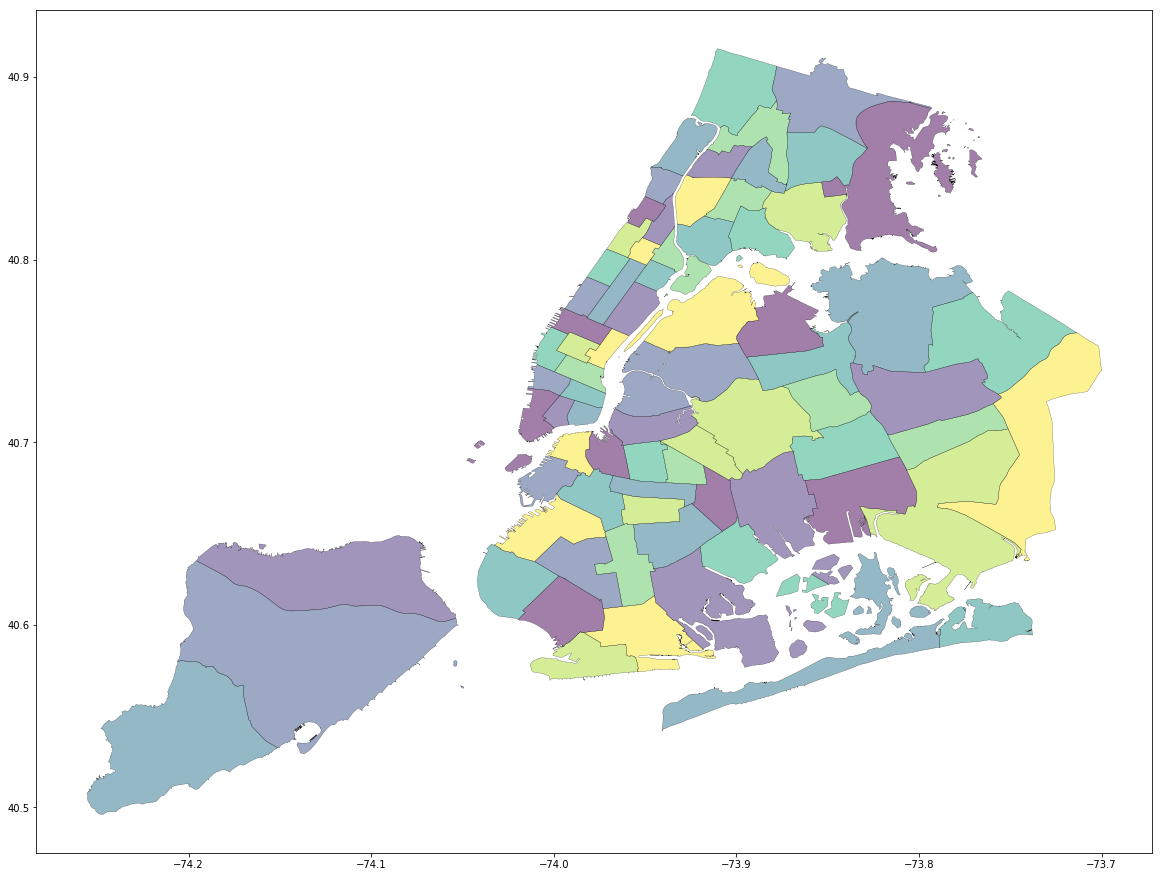

In [16]:
df_nyc = gpd.GeoDataFrame.from_file('data/nyc_police_precincts.geojson')
df_nyc.plot(figsize=(20,20), linewidth=0.2)